### Задание

Самостоятельно напишите нейронную сеть, которая может стать составной частью системы бота для игры в "Крестики-нолики". Используя подготовленную базу изображений, создайте и обучите нейронную сеть, распознающую две категории изображений: крестики и нолики. Добейтесь точности распознавания более 95% (accuracy)


In [1]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam
# Подключение утилит для to_categorical
from tensorflow.keras import utils
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение модуля для работы с файлами
import os
# функция из библиотеки для разделения данных.
from sklearn.model_selection import train_test_split
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt
from PIL import Image
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

In [2]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_pro.zip', None, quiet=True)

'hw_pro.zip'

In [3]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_pro.zip

In [4]:
# Путь к директории с базой
base_dir = '/content/hw_pro'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train_org.shape)
print('Размер массива y_train', y_train_org.shape)

Размер массива x_train (102, 20, 20, 1)
Размер массива y_train (102,)


## решение

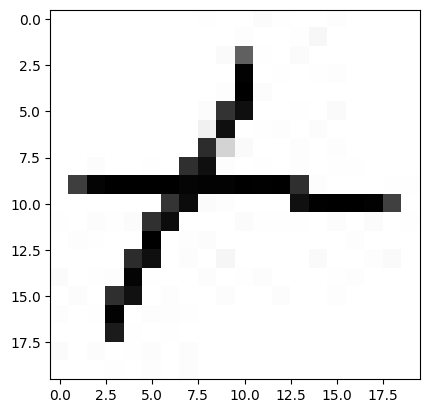

In [5]:
# Номер картинки
n = 37

# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()

In [6]:
# Разделение данных на обучающий и тестовый наборы
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(x_train_org, y_train_org, test_size=0.2, random_state=42)


In [7]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (81, 20, 20, 1) -> (81, 400)
Форма  тестовых данных: (21, 20, 20, 1) -> (21, 400)


In [8]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [9]:
# Задание константы количества распознаваемых классов
CLASS_COUNT = 3

In [10]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [11]:
# Вывод формы y_train
print(y_train.shape)

(81, 3)


In [12]:
# Вывод примера одного выходного вектора
print(y_train[0])

[1. 0. 0.]


In [13]:
# Вывод формы массива меток
print(y_train_org.shape)

(81,)


In [14]:
model = Sequential()

model.add(Dense(50, input_dim=400, activation='relu'))  # Один слой 50 нейронов с relu-активацией
model.add(Dense(30, activation='relu'))  # Второй слой 30 нейронов с relu-активацией
model.add(Dense(20, activation='relu')) # Третий слой 20 нейронов с relu-активацией
model.add(Dense(3, activation='softmax'))  # Последний слой с 3 нейронами и softmax-активацией

In [15]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                20050     
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 3)                 63        
                                                                 
Total params: 22263 (86.96 KB)
Trainable params: 22263 (86.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


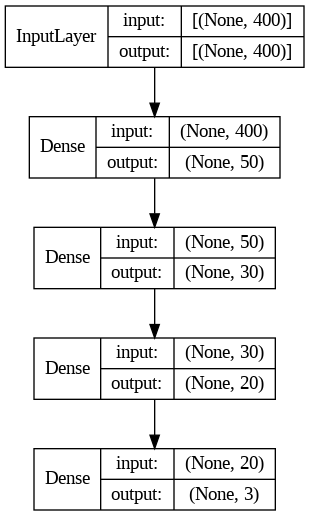

In [16]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [17]:
# Обучение модели
history = model.fit(
    x_train,
    y_train,
    batch_size=10,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)  # Добавляем валидационные данные для отслеживания процесса на тестовой выборке
)

Epoch 1/10
9/9 [==============================] - 9s 156ms/step - loss: 0.8047 - accuracy: 0.4938 - val_loss: 0.6756 - val_accuracy: 0.8571
Epoch 2/10
9/9 [==============================] - 0s 28ms/step - loss: 0.6574 - accuracy: 0.8025 - val_loss: 0.6625 - val_accuracy: 0.4762
Epoch 3/10
9/9 [==============================] - 0s 30ms/step - loss: 0.6226 - accuracy: 0.7037 - val_loss: 0.6317 - val_accuracy: 0.6190
Epoch 4/10
9/9 [==============================] - 0s 14ms/step - loss: 0.6288 - accuracy: 0.5432 - val_loss: 0.5404 - val_accuracy: 0.9048
Epoch 5/10
9/9 [==============================] - 0s 15ms/step - loss: 0.6912 - accuracy: 0.5432 - val_loss: 0.5539 - val_accuracy: 0.9524
Epoch 6/10
9/9 [==============================] - 0s 21ms/step - loss: 0.5225 - accuracy: 0.9259 - val_loss: 0.5480 - val_accuracy: 0.8571
Epoch 7/10
9/9 [==============================] - 0s 27ms/step - loss: 0.4835 - accuracy: 0.9383 - val_loss: 0.4637 - val_accuracy: 1.0000
Epoch 8/10
9/9 [==========

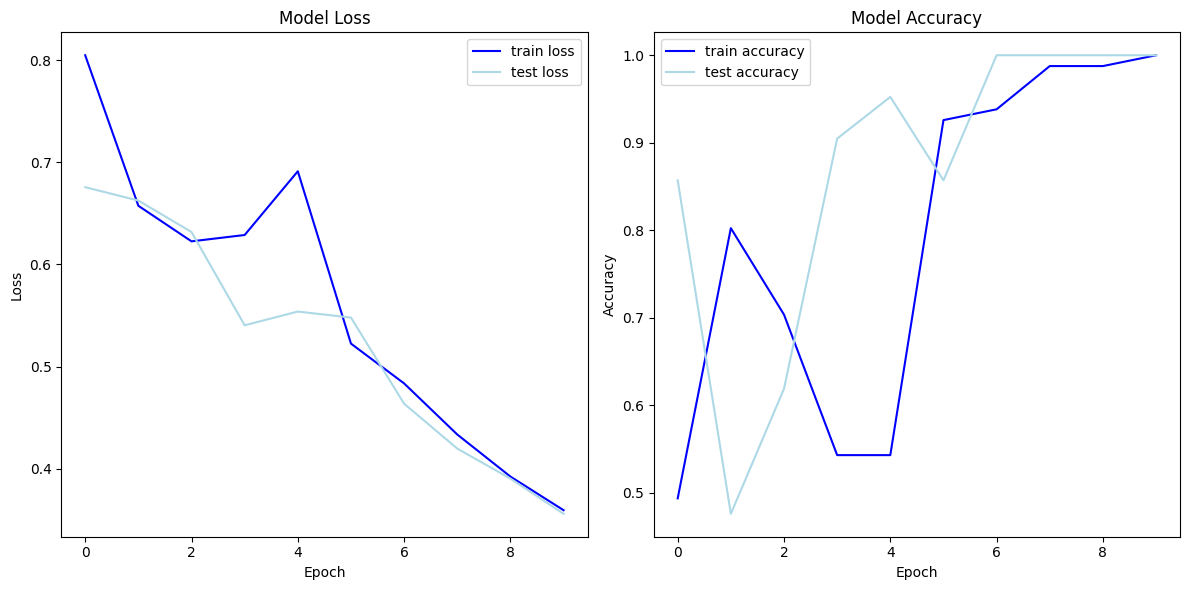

In [18]:
# Графики для обычной модели
plt.figure(figsize=(12, 6))

# График для loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss', color='blue')
plt.plot(history.history['val_loss'], label='test loss', color='lightblue')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График для accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='test accuracy', color='lightblue')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # автоматическое выравнивание графиков
plt.show()


In [19]:
model.save_weights('model.h5')
model.load_weights('model.h5')

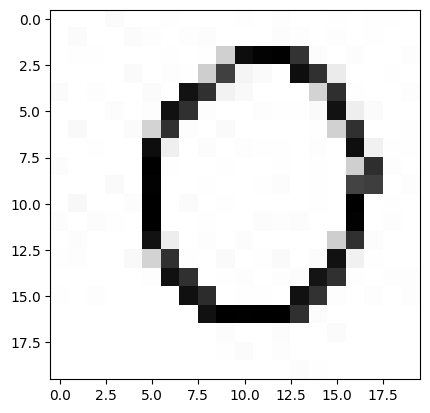

In [20]:
# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [21]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(400,)


In [22]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 400)


In [23]:
# Распознавание примера с моделью model_relu
prediction = model.predict(x)

1/1 [==============================] - 0s 240ms/step


In [24]:
# Вывод результата
print(prediction)


[[0.78095645 0.21823308 0.00081052]]


In [25]:
# Получение и вывод индекса самого большого элемента для модели
pred = np.argmax(prediction)
print(f'Распознанан знак с использованием модели: {pred}')


Распознанан знак с использованием модели: 0


In [26]:
# Вывод правильного ответа для сравнения
print(y_test_org[n_rec])

0


In [27]:
# Оценка модели
loss, accuracy = model.evaluate(x_test, y_test)
print("Model - Test Accuracy:", accuracy)

1/1 [==============================] - 0s 83ms/step - loss: 0.3559 - accuracy: 1.0000
Model - Test Accuracy: 1.0
